In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make plots look nicer
sns.set(style="whitegrid")


In [2]:
# Replace with your actual path
df = pd.read_csv("converted.csv")

# Preview first few rows
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_21036\1514975251.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("converted.csv")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])


In [4]:
# Remove rows with missing month or claims
df_clean = df.dropna(subset=['TransactionMonth', 'TotalClaims'])

# Optional: Check for negative or invalid claims
df_clean = df_clean[df_clean['TotalClaims'] >= 0]


In [5]:
monthly_claims = df_clean.groupby('TransactionMonth')['TotalClaims'].sum().reset_index()

# Rename for clarity
monthly_claims.columns = ['Month', 'TotalClaims']


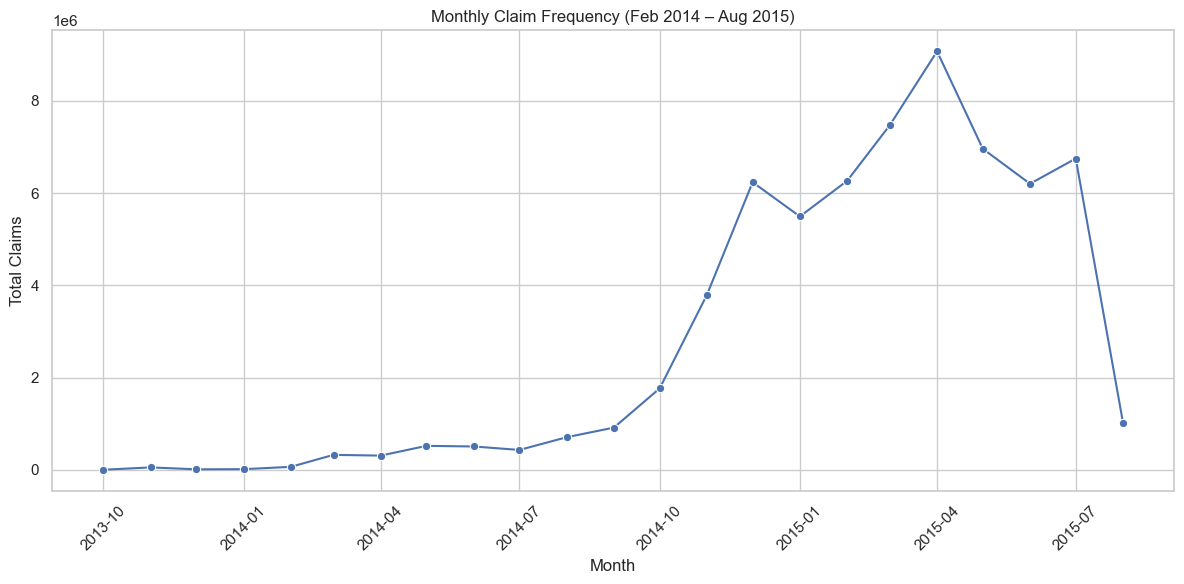

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_claims, x='Month', y='TotalClaims', marker='o')
plt.title('Monthly Claim Frequency (Feb 2014 – Aug 2015)')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


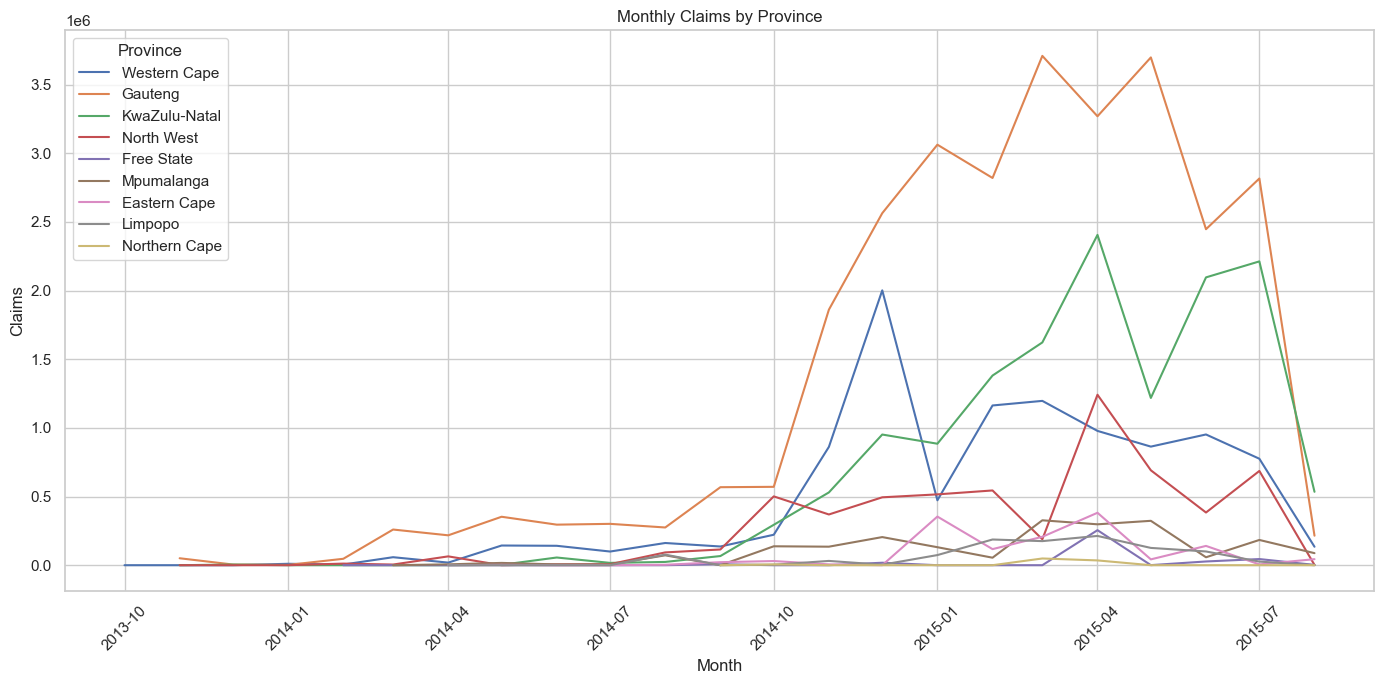

In [7]:
# Example: Claims per Province per Month
claims_by_province = df_clean.groupby(['TransactionMonth', 'Province'])['TotalClaims'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=claims_by_province, x='TransactionMonth', y='TotalClaims', hue='Province')
plt.title('Monthly Claims by Province')
plt.xlabel('Month')
plt.ylabel('Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_claims_trend.png")

plt.show()



In [8]:
plt.savefig("monthly_claims_trend.png")


<Figure size 640x480 with 0 Axes>

In [9]:
monthly_claims.to_csv("monthly_claim_summary.csv", index=False)
